# Quick overview

Here are some quick examples of what you can do with ```xarray.DataArray``` objects. Everything is explained in much more detail in the rest of the documentation.

To begin, import numpy, pandas and xarray using their customary abbreviations:

In [2]:
import numpy as np
import xarray as xr
import pandas as pd

import seaborn as sns  # pandas aware plotting library

## Create a DataArray

You can make a DataArray from scratch by supplying data in the form of a numpy array or list, with optional _dimensions and coordinates_:

In [3]:
 xr.DataArray(np.random.randn(2, 3))


<xarray.DataArray (dim_0: 2, dim_1: 3)>
array([[-1.054539, -0.186417,  0.78153 ],
       [-0.095684,  0.137412, -0.389767]])
Dimensions without coordinates: dim_0, dim_1

In [4]:
data = xr.DataArray(np.random.randn(2, 3), coords={'x': ['a', 'b']}, dims=('x', 'y'))

In [5]:
data

<xarray.DataArray (x: 2, y: 3)>
array([[ 1.092845,  0.45577 , -2.195746],
       [-0.631799,  1.426364, -0.19012 ]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

If you supply a pandas ```Series``` or ```DataFrame```, metadata is copied directly:

In [6]:
xr.DataArray(pd.Series(range(3), index=list('abc'), name='foo'))

<xarray.DataArray 'foo' (dim_0: 3)>
array([0, 1, 2])
Coordinates:
  * dim_0    (dim_0) object 'a' 'b' 'c'

Here are the key properties for a ```DataArray```:

like in pandas, values is a numpy array that you can modify in-place

In [7]:
data.values

array([[ 1.09284512,  0.45577007, -2.1957461 ],
       [-0.63179893,  1.4263636 , -0.19011995]])

In [8]:
data.dims

('x', 'y')

In [9]:
data.coords

Coordinates:
  * x        (x) <U1 'a' 'b'

you can use this dictionary to store arbitrary metadata

In [10]:
data.attrs

OrderedDict()

## Indexing

```xarray``` supports four kind of indexing. These operations are just as fast as in pandas, because we borrow pandas’ indexing machinery.

positional and by integer label, like numpy

In [11]:
data[[0, 1]]

<xarray.DataArray (x: 2, y: 3)>
array([[ 1.092845,  0.45577 , -2.195746],
       [-0.631799,  1.426364, -0.19012 ]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

 positional and by coordinate label, like pandas

In [12]:
data.loc['a':'b']

<xarray.DataArray (x: 2, y: 3)>
array([[ 1.092845,  0.45577 , -2.195746],
       [-0.631799,  1.426364, -0.19012 ]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

by dimension name and integer label

In [13]:
data.isel(x=slice(2))

<xarray.DataArray (x: 2, y: 3)>
array([[ 1.092845,  0.45577 , -2.195746],
       [-0.631799,  1.426364, -0.19012 ]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

by dimension name and coordinate label

In [14]:
data.sel(x=['a', 'b'])

<xarray.DataArray (x: 2, y: 3)>
array([[ 1.092845,  0.45577 , -2.195746],
       [-0.631799,  1.426364, -0.19012 ]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

## Computation

Data arrays work very similarly to numpy ```ndarrays```:

In [15]:
 data + 10

<xarray.DataArray (x: 2, y: 3)>
array([[11.092845, 10.45577 ,  7.804254],
       [ 9.368201, 11.426364,  9.80988 ]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

In [16]:
np.sin(data)

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.887939,  0.440154, -0.810993],
       [-0.590597,  0.989588, -0.188977]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

In [17]:
data.T

<xarray.DataArray (y: 3, x: 2)>
array([[ 1.092845, -0.631799],
       [ 0.45577 ,  1.426364],
       [-2.195746, -0.19012 ]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

In [18]:
data.sum()

<xarray.DataArray ()>
array(-0.042686)

However, aggregation operations can use dimension names instead of axis numbers:

In [19]:
data.mean(dim='x')

<xarray.DataArray (y: 3)>
array([ 0.230523,  0.941067, -1.192933])
Dimensions without coordinates: y

Arithmetic operations broadcast based on dimension name. This means you don’t need to insert dummy dimensions for alignment:

In [20]:
 a = xr.DataArray(np.random.randn(3), [data.coords['y']])


In [21]:
 b = xr.DataArray(np.random.randn(4), dims='z')

In [22]:
a

<xarray.DataArray (y: 3)>
array([ 0.270096,  0.422831, -1.238195])
Coordinates:
  * y        (y) int64 0 1 2

In [23]:
b

<xarray.DataArray (z: 4)>
array([-2.055762, -0.215768,  0.099762, -1.140762])
Dimensions without coordinates: z

In [24]:
a + b

<xarray.DataArray (y: 3, z: 4)>
array([[-1.785666,  0.054328,  0.369858, -0.870666],
       [-1.632931,  0.207063,  0.522593, -0.717931],
       [-3.293957, -1.453963, -1.138433, -2.378957]])
Coordinates:
  * y        (y) int64 0 1 2
Dimensions without coordinates: z

It also means that in most cases you do not need to worry about the order of dimensions:

In [25]:
data - data.T

<xarray.DataArray (x: 2, y: 3)>
array([[0., 0., 0.],
       [0., 0., 0.]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

Operations also align based on index labels:

In [26]:
data[:-1] - data[:1]

<xarray.DataArray (x: 1, y: 3)>
array([[0., 0., 0.]])
Coordinates:
  * x        (x) <U1 'a'
Dimensions without coordinates: y

## GroupBy

```xarray``` supports grouped operations using a very similar API to pandas:

In [27]:
labels = xr.DataArray(['E', 'F', 'E'], [data.coords['y']], name='labels')

In [28]:
labels

<xarray.DataArray 'labels' (y: 3)>
array(['E', 'F', 'E'], dtype='<U1')
Coordinates:
  * y        (y) int64 0 1 2

In [29]:
data.groupby(labels).mean('y')

<xarray.DataArray (x: 2, labels: 2)>
array([[-0.55145 ,  0.45577 ],
       [-0.410959,  1.426364]])
Coordinates:
  * x        (x) <U1 'a' 'b'
  * labels   (labels) object 'E' 'F'

In [30]:
 data.groupby(labels).apply(lambda x: x - x.min())

<xarray.DataArray (x: 2, y: 3)>
array([[3.288591, 0.      , 0.      ],
       [1.563947, 0.970594, 2.005626]])
Coordinates:
  * x        (x) <U1 'a' 'b'
  * y        (y) int64 0 1 2
    labels   (y) <U1 'E' 'F' 'E'

## pandas

```Xarray``` objects can be easily converted to and from pandas objects:

In [31]:
series = data.to_series()

In [32]:
series

x  y
a  0    1.092845
   1    0.455770
   2   -2.195746
b  0   -0.631799
   1    1.426364
   2   -0.190120
dtype: float64

In [33]:
series.to_xarray()

<xarray.DataArray (x: 2, y: 3)>
array([[ 1.092845,  0.45577 , -2.195746],
       [-0.631799,  1.426364, -0.19012 ]])
Coordinates:
  * x        (x) object 'a' 'b'
  * y        (y) int64 0 1 2

## Datasets

```xarray.Dataset``` is a dict-like container of aligned ```DataArray``` objects. You can think of it as a multi-dimensional generalization of the ```pandas.DataFrame```:

In [34]:
ds = xr.Dataset({'foo': data, 'bar': ('x', [1, 2]), 'baz': np.pi})

In [35]:
ds

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 1.093 0.4558 -2.196 -0.6318 1.426 -0.1901
    bar      (x) int64 1 2
    baz      float64 3.142

Use dictionary indexing to pull out ```Dataset``` variables as ```DataArray``` objects:

In [36]:
ds['foo']

<xarray.DataArray 'foo' (x: 2, y: 3)>
array([[ 1.092845,  0.45577 , -2.195746],
       [-0.631799,  1.426364, -0.19012 ]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

Variables in datasets can have different ```dtype``` and even different dimensions, but all dimensions are assumed to refer to points in the same shared coordinate system.

You can do almost everything you can do with ```DataArray``` objects with ```Dataset``` objects (including indexing and arithmetic) if you prefer to work with multiple variables at once.

## NetCDF

NetCDF is the recommended binary serialization format for xarray objects. Users from the geosciences will recognize that the ```Dataset``` data model looks very similar to a netCDF file (which, in fact, inspired it).

You can directly read and write xarray objects to disk using ```to_netcdf()```, ```open_dataset()``` and ```open_dataarray()```:

In [37]:
ds.to_netcdf('example.nc')

In [38]:
xr.open_dataset('example.nc')

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) object 'a' 'b'
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 ...
    bar      (x) int32 ...
    baz      float64 ...

## Toy weather data

Here is an example of how to easily manipulate a toy weather dataset using xarray and other recommended Python libraries:

- Examine a dataset with pandas and seaborn
- Probability of freeze by calendar month
- Monthly averaging
- Calculate monthly anomalies
- Calculate standardized monthly anomalies
- Fill missing values with climatology



In [39]:
np.random.seed(123)

times = pd.date_range('2000-01-01', '2001-12-31', name='time')
annual_cycle = np.sin(2 * np.pi * (times.dayofyear.values / 365.25 - 0.28))

base = 10 + 15 * annual_cycle.reshape(-1, 1)
tmin_values = base + 3 * np.random.randn(annual_cycle.size, 3)
tmax_values = base + 10 + 3 * np.random.randn(annual_cycle.size, 3)

ds = xr.Dataset({'tmin': (('time', 'location'), tmin_values),
                 'tmax': (('time', 'location'), tmax_values)},
                {'time': times, 'location': ['IA', 'IN', 'IL']})

## Examine a dataset with pandas and seaborn

In [40]:
ds

<xarray.Dataset>
Dimensions:   (location: 3, time: 731)
Coordinates:
  * time      (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 ...
  * location  (location) <U2 'IA' 'IN' 'IL'
Data variables:
    tmin      (time, location) float64 -8.037 -1.788 -3.932 -9.341 -6.558 ...
    tmax      (time, location) float64 12.98 3.31 6.779 0.4479 6.373 4.843 ...

In [41]:
df = ds.to_dataframe()

In [42]:
df.head()

tmin       tmax
location time                            
IA       2000-01-01  -8.037369  12.980549
         2000-01-02  -9.341157   0.447856
         2000-01-03 -12.139719   5.322699
         2000-01-04  -7.492914   1.889425
         2000-01-05  -0.447129   0.791176

In [43]:
df.describe()

,tmin,tmax
count,2193.000000,2193.000000
mean,9.975426,20.108232
std,10.963228,11.010569
min,-13.395763,-3.506234
25%,-0.040347,9.853905
50%,10.060403,19.967409
75%,20.083590,30.045588
max,33.456060,43.271148


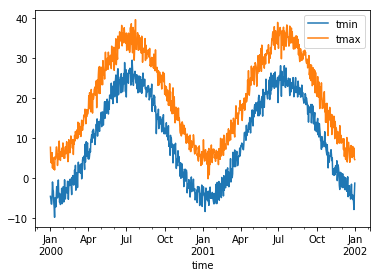

In [44]:
ds.mean(dim='location').to_dataframe().plot()

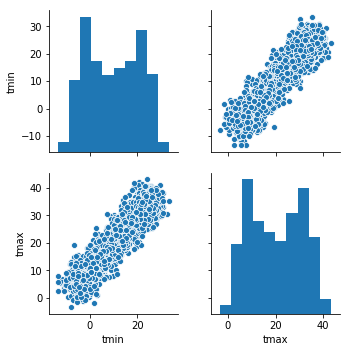

In [45]:
sns.pairplot(df.reset_index(), vars=ds.data_vars)

## Probability of freeze by calendar month

In [46]:
 freeze = (ds['tmin'] <= 0).groupby('time.month').mean('time')

In [47]:
freeze

<xarray.DataArray 'tmin' (month: 12, location: 3)>
array([[0.951613, 0.887097, 0.935484],
       [0.842105, 0.719298, 0.77193 ],
       [0.241935, 0.129032, 0.16129 ],
       [0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      ],
       [0.      , 0.016129, 0.      ],
       [0.333333, 0.35    , 0.233333],
       [0.935484, 0.854839, 0.822581]])
Coordinates:
  * location  (location) <U2 'IA' 'IN' 'IL'
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

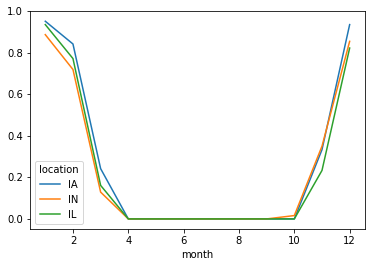

In [48]:
 freeze.to_pandas().plot()

## Monthly averaging

In [49]:
monthly_avg = ds.resample(time='1MS').mean()

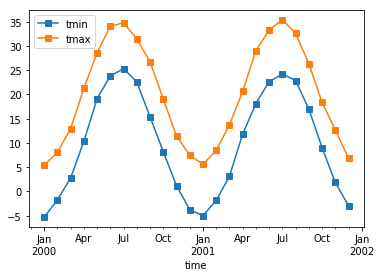

In [50]:
monthly_avg.sel(location='IA').to_dataframe().plot(style='s-')

## Calculate monthly anomalies

In climatology, “anomalies” refer to the difference between observations and typical weather for a particular season. Unlike observations, anomalies should not show any seasonal cycle.

In [51]:
climatology = ds.groupby('time.month').mean('time')

In [52]:
anomalies = ds.groupby('time.month') - climatology

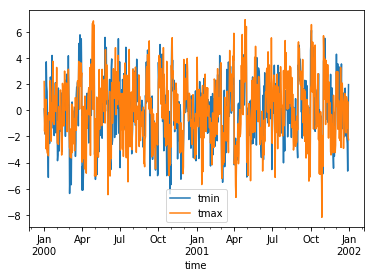

In [53]:
anomalies.mean('location').to_dataframe()[['tmin', 'tmax']].plot()

## Calculate standardized monthly anomalies

You can create standardized anomalies where the difference between the observations and the climatological monthly mean is divided by the climatological standard deviation.

In [54]:
 climatology_mean = ds.groupby('time.month').mean('time')

In [55]:
 climatology_std = ds.groupby('time.month').std('time')

In [57]:
stand_anomalies = xr.apply_ufunc(
    lambda x, m, s: (x - m) / s,
    ds.groupby('time.month'),
    climatology_mean, climatology_std)

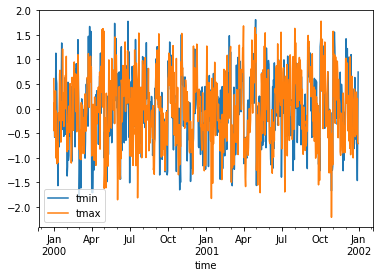

In [58]:
stand_anomalies.mean('location').to_dataframe()[['tmin', 'tmax']].plot()

## Fill missing values with climatology

The ```fillna()``` method on grouped objects lets you easily fill missing values by group:

In [59]:
 some_missing = ds.tmin.sel(time=ds['time.day'] > 15).reindex_like(ds)

In [60]:
filled = some_missing.groupby('time.month').fillna(climatology.tmin)

In [61]:
both = xr.Dataset({'some_missing': some_missing, 'filled': filled})

In [62]:
both

<xarray.Dataset>
Dimensions:       (location: 3, time: 731)
Coordinates:
  * time          (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 ...
  * location      (location) object 'IA' 'IN' 'IL'
    month         (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
Data variables:
    some_missing  (time, location) float64 nan nan nan nan nan nan nan nan ...
    filled        (time, location) float64 -5.163 -4.216 -4.681 -5.163 ...

In [63]:
df = both.sel(time='2000').mean('location').reset_coords(drop=True).to_dataframe()

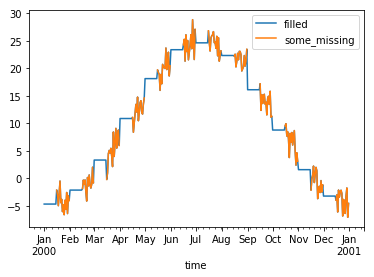

In [64]:
df[['filled', 'some_missing']].plot()